# Lab 3

Ganti constant `STATIC` menjadi path ke gambar-gambar yang akan digunakan dan `OUT` menjadi path ke output directory. Contoh jika gambar ada di directory yang sama dengan script ini, maka value nya menjadi `"."`. Library yang dibutuhkan untuk menjalankan script ini adalah sebagai berikut: `scipy`, `scikit-image`, `matplotlib`, `numpy`, dan `ipympl`. Cara menjalankan scriptnya sama seperti menjalankan notebook biasa.

In [1]:
import functools, os
from pathlib import Path

SUB = "lab3"
BASE_DIR = Path(os.path.abspath("")).resolve(strict=True).parent
OUT = os.path.join(BASE_DIR, "out", SUB)
STATIC = os.path.join(BASE_DIR, "static", SUB)

In [2]:
import scipy.fftpack as fp
import helper as hlp
import matplotlib.pyplot as plt
import numpy as np

from skimage import color, io

# %matplotlib widget

In [3]:
def displayable(image, shift=True):
    s = fp.fftshift(np.log(1 + abs(image))) if shift else np.log(1 + abs(image))
    return s

## Building

In [4]:
build = color.rgb2gray(color.rgba2rgb(io.imread(os.path.join(STATIC, "bulding.jpg"))))

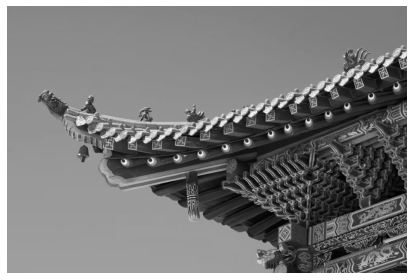

In [5]:
fig, ax0 = plt.subplots()
ax0.imshow(build, cmap="gray")
ax0.set_axis_off()
fig.tight_layout()
plt.show()

### Frequency Domain

In [6]:
build_ft = fp.fft2(build)
build_ft_norm = abs(build_ft)
build_ft_scale = np.log(1 + build_ft_norm)
build_ft_shifted = fp.fftshift(build_ft_scale)

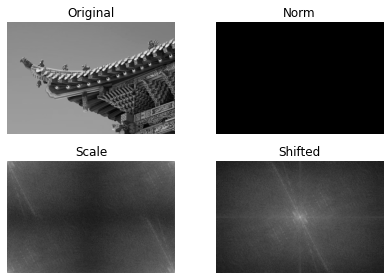

In [7]:
title = [["Original", "Norm"], ["Scale", "Shifted"]]
images = [[build, build_ft_norm], [build_ft_scale, build_ft_shifted]]

fig, axs = plt.subplots(2, 2)
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.set_title(title[i][j])
        ax.imshow(images[i][j], cmap="gray")
        ax.set_axis_off()
fig.tight_layout()
plt.show()

### Filter

In [8]:
build_ft_m, build_ft_n = hlp.paddedsize(build.shape[0], build.shape[1])
build_padd_ft = fp.fft2(build, (build_ft_m, build_ft_n))

#### Low Pass Filter

##### Ideal

In [9]:
lpid_d0 = 0.04 * build_ft_m
build_lpid_filter = hlp.lpfilter("ideal", build_ft_m, build_ft_n, lpid_d0)
build_ft_lpid = build_padd_ft * build_lpid_filter
build_lpid = fp.ifft2(build_ft_lpid).real[: build.shape[0], : build.shape[1]]

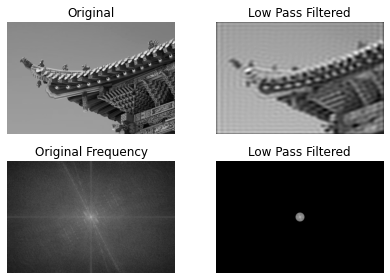

In [10]:
title = [
    ["Original", "Low Pass Filtered"],
    ["Original Frequency", "Low Pass Filtered"]
]
images = [
    [build, build_lpid],
    [displayable(build_padd_ft), displayable(build_ft_lpid)]
]

fig, axs = plt.subplots(2, 2)
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.set_title(title[i][j])
        ax.imshow(images[i][j], cmap="gray")
        ax.set_axis_off()
fig.tight_layout()
plt.show()

##### Butterworth

In [11]:
lpbt_d0 = 0.1 * build_ft_m
build_lpbt_filter = hlp.lpfilter("btw", build_ft_m, build_ft_n, lpbt_d0)
build_ft_lpbt = build_padd_ft * build_lpbt_filter
build_lpbt = fp.ifft2(build_ft_lpbt).real[: build.shape[0], : build.shape[1]]

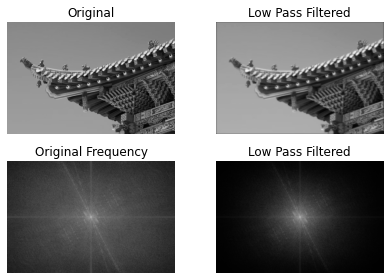

In [12]:
title = [
    ["Original", "Low Pass Filtered"],
    ["Original Frequency", "Low Pass Filtered"]
]
images = [
    [build, build_lpbt],
    [displayable(build_padd_ft), displayable(build_ft_lpbt)]
]

fig, axs = plt.subplots(2, 2)
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.set_title(title[i][j])
        ax.imshow(images[i][j], cmap="gray")
        ax.set_axis_off()
fig.tight_layout()
plt.show()

##### Perbedaan

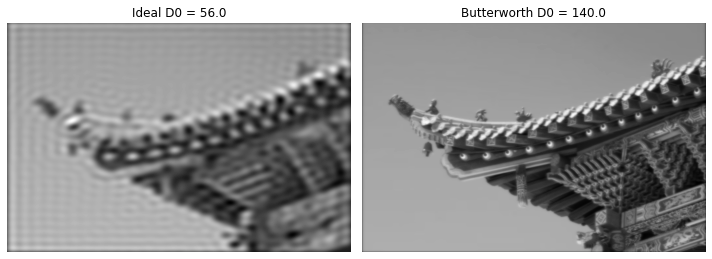

In [13]:
title = [f"Ideal D0 = {lpid_d0}", f"Butterworth D0 = {lpbt_d0}"]
images = [build_lpid, build_lpbt]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for i, ax in enumerate(axs.flatten()):
        ax.set_title(title[i])
        ax.imshow(images[i], cmap="gray")
        ax.set_axis_off()
fig.tight_layout()
plt.show()

Perbedaan yang paling jelas adalah hasil filter ideal menghasilkan gambar yang memiliki gelombang/ombak, sedangkan hasil butterworth filter tidak ada gelombang sama sekali. Hasil smoothing dari ideal juga sangat agresif yang menghasilkan gambar yang blurry. Di lain sisi, hasil filter butterworth dapat melakukan smoothing tanpa menghancurkan detail gambar, bahkan dengan nilai `d0` yang lebih tinggi.

#### High Pass Filter

##### Ideal

In [14]:
hpid_d0 = 0.05 * build_ft_m
build_hpid_filter = hlp.hpfilter("ideal", build_ft_m, build_ft_n, hpid_d0)
build_ft_hpid = build_padd_ft * build_hpid_filter
build_hpid = fp.ifft2(build_ft_hpid).real[: build.shape[0], : build.shape[1]]

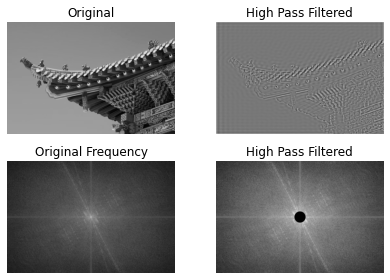

In [15]:
title = [
    ["Original", "High Pass Filtered"],
    ["Original Frequency", "High Pass Filtered"]
]
images = [
    [build, build_hpid],
    [displayable(build_padd_ft), displayable(build_ft_hpid)]
]

fig, axs = plt.subplots(2, 2)
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.set_title(title[i][j])
        ax.imshow(images[i][j], cmap="gray")
        ax.set_axis_off()
fig.tight_layout()
plt.show()

##### Butterworth

In [16]:
hpbt_d0 = 0.06 * build_ft_m
build_hpbt_filter = hlp.hpfilter("btw", build_ft_m, build_ft_n, hpbt_d0)
build_ft_hpbt = build_padd_ft * build_hpbt_filter
build_hpbt = fp.ifft2(build_ft_hpbt).real[: build.shape[0], : build.shape[1]]

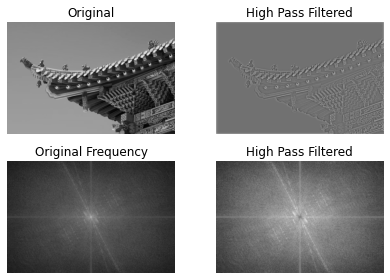

In [17]:
title = [
    ["Original", "High Pass Filtered"],
    ["Original Frequency", "High Pass Filtered"]
]
images = [
    [build, build_hpbt],
    [displayable(build_padd_ft), displayable(build_ft_hpbt)]
]

fig, axs = plt.subplots(2, 2)
for i, row in enumerate(axs):
    for j, ax in enumerate(row):
        ax.set_title(title[i][j])
        ax.imshow(images[i][j], cmap="gray")
        ax.set_axis_off()
fig.tight_layout()
plt.show()

##### Perbedaan

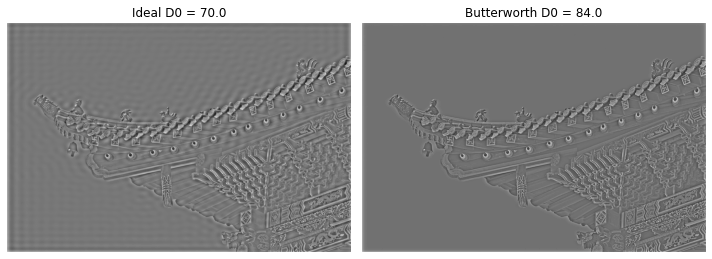

In [18]:
title = [f"Ideal D0 = {hpid_d0}", f"Butterworth D0 = {hpbt_d0}"]
images = [build_hpid, build_hpbt]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
for i, ax in enumerate(axs.flatten()):
        ax.set_title(title[i])
        ax.imshow(images[i], cmap="gray")
        ax.set_axis_off()
fig.tight_layout()
plt.show()

Perbedaan yang paling jelas adalah penggunaan ideal filter menghasilkan gambar yang seperti ada ombak atau gelombang, sedangkan hal ini tidak terjadi pada butterworth filter. Butterworth juga bisa mempertahankan detail warna/contrast lebih baik dari ideal, padahal dengan D0 yang lebih tinggi. Jika di-zoom sedikit, menghasilkan edges yang lebih bagus, tidak pixelated seperti ideal (margin nya tidak besar tapi bisa terlihat).

### Pengaruh D0

// TODO

## Train

In [19]:
train = io.imread(os.path.join(STATIC, "train.jpg"))

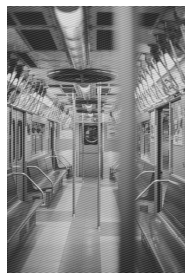

In [20]:
fig, ax0 = plt.subplots()
ax0.imshow(train, cmap="gray")
ax0.set_axis_off()
fig.tight_layout()
plt.show()

### Frequency Domain

In [21]:
train_ft = fp.fft2(train)
train_ft_norm = abs(train_ft)
train_ft_scale = np.log(1 + train_ft_norm)
train_ft_shifted = fp.fftshift(train_ft_scale)

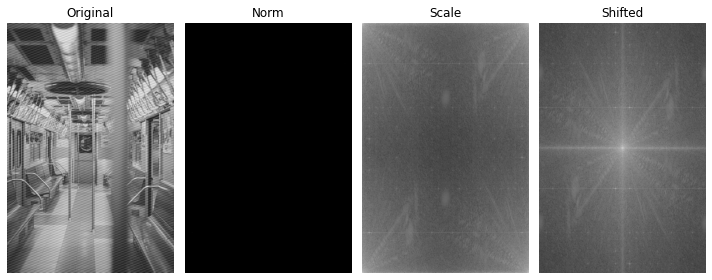

In [22]:
title = ["Original", "Norm", "Scale", "Shifted"]
images = [train, train_ft_norm, train_ft_scale, train_ft_shifted]

fig, axs = plt.subplots(1, 4, figsize=(10, 4))
for i, ax in enumerate(axs.flatten()):
        ax.set_title(title[i])
        ax.imshow(images[i], cmap="gray")
        ax.set_axis_off()
fig.tight_layout()
plt.show()

### Filtering

Untuk membersihkan gambar asli, kita bisa menggunakan notch filtering. Hal ini di karenakan sifat dari noise nya yang jika di ubah ke domain frekuensi, noise tersebut akan berpusat ke beberapa titik. Notch filtering bisa menghaluskan *hotspot* tersebut. Setelah di proses ke domain spasial kembali, noise tersebut akan hilang/berkurang.

Di gambar ini, saya melihat 4 hotspot yang besar dan beberapa hotspot kecil. Saya memilih 4 hotspot besar dan 2 hotspot yang agak kecil.

In [23]:
train_ft_m, train_ft_n = hlp.paddedsize(train.shape[0], train.shape[1])
train_padd_ft = fp.fft2(train, (train_ft_m, train_ft_n))

In [24]:
XS_AND_YS = [(1215, 307), (53, 1594), (53, 308), (1214, 1594), (53, 881), (1214, 1021)]
notchs = []
for x, y in XS_AND_YS:
    notchs.append(hlp.notch("gaussian", train_ft_m, train_ft_n, 10, x, y))
train_ft_notch = train_padd_ft * functools.reduce(lambda acc, notch: acc * notch, notchs)
train_notch = fp.ifft2(train_ft_notch).real[: train.shape[0], : train.shape[1]]

### Analisa

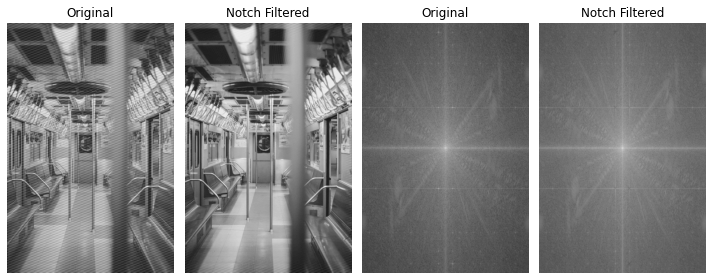

In [25]:
title = ["Original", "Notch Filtered", "Original", "Notch Filtered"]
images = [train, train_notch, displayable(train_ft), displayable(train_ft_notch)]

fig, axs = plt.subplots(1, 4, figsize=(10, 4))
for i, ax in enumerate(axs.flatten()):
        ax.set_title(title[i])
        ax.imshow(images[i], cmap="gray")
        ax.set_axis_off()
fig.tight_layout()
plt.show()

Analisa gambar di domain spasial, kita bisa lihat gambarnya ada noise yang mempunyai sebuah pattern. Setelah melakukan notch filtering pada gambar asli, noise tersebut terlihat hilang atau sulit dilihat tanpa zoom.

Analisa gambar di domain frekuensi, bisa dilihat ada beberapa hotspot, 4 di area tengah dan beberap adi tempat lain. 4 hotspot yang di tengah intinya terlihat sudah tidak terang lagi, dengan kata lain, sudah terfilter.